## Programing For Data Science Project

#### By: Muhammad Abeer Khan
##### (Registration No. 300689)

##### Data Analysis of IMDb Movies
Data Set Link: https://www.kaggle.com/datasets/chenyanglim/imdb-v2  

## CODE:

#### Initial Steps: Importing Libraries, Identification & Description of data set

In [85]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [86]:
pd.set_option('display.max_columns', 500)

In [87]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [88]:
path = '/content/drive/MyDrive/Colab Notebooks/IMDB_Movies_2000_2020.csv'

In [89]:
df=pd.read_csv(path)

In [90]:
df.shape

(5487, 24)

In [91]:
df.columns

Index(['imdb_title_id', 'title', 'original_title', 'year', 'date_published',
       'genre', 'duration', 'country', 'language_1', 'language_2',
       'language_3', 'director', 'writer', 'actors', 'actors_1', 'actors_f2',
       'description', 'desc35', 'avg_vote', 'votes', 'budget',
       'usa_gross_income', 'worlwide_gross_income', 'reviews_from_users'],
      dtype='object')

In [92]:
df.head(3)

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language_1,language_2,language_3,director,writer,actors,actors_1,actors_f2,description,desc35,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,reviews_from_users
0,tt0035423,Kate & Leopold,Kate & Leopold,2001,01/03/2002,"Comedy, Fantasy, Romance",118,USA,English,French,NaN,James Mangold,"Steven Rogers, James Mangold","Meg Ryan, Hugh Jackman, Liev Schreiber, Brecki...",Meg Ryan,"Meg Ryan, Hugh Jackman",An English Duke from 1876 is inadvertedly drag...,An English Duke from 1876 is inadvertedly,6.4,77852,48000000,47121859.0,76019048,341.0
1,tt0118589,Glitter,Glitter,2001,30/11/2001,"Drama, Music, Romance",104,USA,English,NaN,NaN,Vondie Curtis-Hall,"Cheryl L. West, Kate Lanier","Mariah Carey, Max Beesley, Da Brat, Tia Texada...",Mariah Carey,"Mariah Carey, Max Beesley",A young singer dates a disc jockey who helps h...,A young singer dates a disc jockey,2.2,21298,22000000,4274407.0,5271666,319.0
2,tt0118694,In the Mood for Love,Fa yeung nin wah,2000,27/10/2000,"Drama, Romance",98,"Hong Kong, China",Cantonese,Shanghainese,French,Kar-Wai Wong,Kar-Wai Wong,"Maggie Cheung, Tony Chiu-Wai Leung, Ping Lam S...",Maggie Cheung,"Maggie Cheung, Tony Chiu-Wai Leung","Two neighbors, a woman and a man, form a stron...","Two neighbors, a woman and a man,",8.1,119171,NaN,2738980.0,12854953,422.0


#### Cleaning & Pre processing of the data set

In [93]:
df_cleaned = df.dropna()

df_cleaned = df_cleaned.drop_duplicates()

df_cleaned.to_csv("cleaned_IMDB_Movies.csv", index=False)


In [94]:
print("Dataset Description:")
print(df_cleaned.describe(include='all'))

print("Cleaned Dataset:")
print(df_cleaned.head())


Dataset Description:
       imdb_title_id             title original_title         year  \
count            685               685            685   685.000000   
unique           685               684            683          NaN   
top        tt0120679  Charlie's Angels            War          NaN   
freq               1                 2              2          NaN   
mean             NaN               NaN            NaN  2009.735766   
std              NaN               NaN            NaN     5.568181   
min              NaN               NaN            NaN  2000.000000   
25%              NaN               NaN            NaN  2005.000000   
50%              NaN               NaN            NaN  2010.000000   
75%              NaN               NaN            NaN  2015.000000   
max              NaN               NaN            NaN  2019.000000   

       date_published                   genre    duration country language_1  \
count             685                     685  685.000000 

In [95]:
df_cleaned = df_cleaned.apply(pd.to_numeric, errors='ignore')

df_cleaned = df_cleaned.dropna(axis=1, how='all')

df_cleaned = df_cleaned.dropna(subset=['year', 'duration'])


<ipython-input-95-c0e4cd3c42d5>:1: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df_cleaned = df_cleaned.apply(pd.to_numeric, errors='ignore')


In [96]:
df_cleaned[['duration', 'votes', 'avg_vote', 'worlwide_gross_income']].describe()

,duration,votes,avg_vote,worlwide_gross_income
count,685.000000,6.850000e+02,685.000000,6.850000e+02
mean,116.404380,1.629053e+05,6.671679,1.594672e+08
std,19.342972,2.047599e+05,0.860377,2.472988e+08
min,80.000000,1.006600e+04,2.500000,3.211800e+04
25%,102.000000,3.858200e+04,6.200000,2.034305e+07
50%,115.000000,9.058100e+04,6.700000,7.125500e+07
75%,127.000000,2.015800e+05,7.300000,1.980872e+08
max,201.000000,2.002816e+06,8.900000,2.797801e+09


In [97]:
df_cleaned = df.dropna(axis=1, thresh=len(df) * 0.5)

for col in df_cleaned.select_dtypes(include=['object']).columns:
    df_cleaned[col] = pd.to_numeric(df_cleaned[col], errors='ignore')

df_cleaned = df_cleaned.dropna(subset=['year', 'duration', 'genre'])

df_cleaned.to_csv("cleaned_IMDB_Movies.csv", index=False)

print("Dataset Description:")
display(df_cleaned.describe(include='all').transpose().style.set_properties(**{'background-color': 'black', 'color': 'white'}))

print("Cleaned Dataset:")
display(df_cleaned.head())

<ipython-input-97-ace349aa116d>:4: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df_cleaned[col] = pd.to_numeric(df_cleaned[col], errors='ignore')
<ipython-input-97-ace349aa116d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[col] = pd.to_numeric(df_cleaned[col], errors='ignore')


Dataset Description:


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
imdb_title_id,5487,5487,tt0035423,1,nan,nan,nan,nan,nan,nan,nan
title,5487,5463,The Host,2,nan,nan,nan,nan,nan,nan,nan
original_title,5487,5445,Race,2,nan,nan,nan,nan,nan,nan,nan
year,5487.000000,nan,nan,nan,2010.229269,5.523944,2000.000000,2006.000000,2010.000000,2015.000000,2020.000000
date_published,5487,2094,23/08/2002,12,nan,nan,nan,nan,nan,nan,nan
genre,5487,336,"Comedy, Drama, Romance",293,nan,nan,nan,nan,nan,nan,nan
duration,5487.000000,nan,nan,nan,109.523419,20.473250,45.000000,95.000000,106.000000,119.000000,366.000000
country,5487,982,USA,2214,nan,nan,nan,nan,nan,nan,nan
language_1,5483,57,English,4432,nan,nan,nan,nan,nan,nan,nan
director,5487,2661,Woody Allen,19,nan,nan,nan,nan,nan,nan,nan


Cleaned Dataset:


,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language_1,director,writer,actors,actors_1,actors_f2,description,desc35,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,reviews_from_users
0,tt0035423,Kate & Leopold,Kate & Leopold,2001,01/03/2002,"Comedy, Fantasy, Romance",118,USA,English,James Mangold,"Steven Rogers, James Mangold","Meg Ryan, Hugh Jackman, Liev Schreiber, Brecki...",Meg Ryan,"Meg Ryan, Hugh Jackman",An English Duke from 1876 is inadvertedly drag...,An English Duke from 1876 is inadvertedly,6.4,77852,48000000,47121859.0,76019048,341.0
1,tt0118589,Glitter,Glitter,2001,30/11/2001,"Drama, Music, Romance",104,USA,English,Vondie Curtis-Hall,"Cheryl L. West, Kate Lanier","Mariah Carey, Max Beesley, Da Brat, Tia Texada...",Mariah Carey,"Mariah Carey, Max Beesley",A young singer dates a disc jockey who helps h...,A young singer dates a disc jockey,2.2,21298,22000000,4274407.0,5271666,319.0
2,tt0118694,In the Mood for Love,Fa yeung nin wah,2000,27/10/2000,"Drama, Romance",98,"Hong Kong, China",Cantonese,Kar-Wai Wong,Kar-Wai Wong,"Maggie Cheung, Tony Chiu-Wai Leung, Ping Lam S...",Maggie Cheung,"Maggie Cheung, Tony Chiu-Wai Leung","Two neighbors, a woman and a man, form a stron...","Two neighbors, a woman and a man,",8.1,119171,NaN,2738980.0,12854953,422.0
3,tt0120202,"Hollywood, Vermont",State and Main,2000,31/05/2002,"Comedy, Drama",105,"France, USA",English,David Mamet,David Mamet,"Michael Higgins, Michael Bradshaw, Morris Lamo...",Michael Higgins,"Michael Higgins, Michael Bradshaw",A movie crew invades a small town whose reside...,A movie crew invades a small town,6.7,20220,NaN,6944471.0,9206279,175.0
4,tt0120263,Canzoni del secondo piano,Sånger från andra våningen,2000,06/10/2000,"Comedy, Drama",98,"Sweden, Norway, Denmark",Swedish,Roy Andersson,Roy Andersson,"Lars Nordh, Stefan Larsson, Bengt C.W. Carlsso...",Lars Nordh,"Lars Nordh, Stefan Larsson",Where are we humans going? A film poem inspire...,Where are we humans going? A film,7.6,17188,NaN,80334.0,80334,110.0


#### Data Analysis & Visualization

In [98]:
sns.set(style="whitegrid")

# 1. Statistics
mean_values = df_cleaned.mean(numeric_only=True)

median_values = df_cleaned.median(numeric_only=True)

correlation_matrix = df_cleaned.corr(numeric_only=True)

mean_values.to_csv('mean_values.csv')
median_values.to_csv('median_values.csv')
correlation_matrix.to_csv('correlation_matrix.csv')

print("Mean Values:")
print(mean_values)

print("\nMedian Values:")
print(median_values)

print("\nCorrelation Matrix:")
print(correlation_matrix)


Mean Values:
year                  2.010229e+03
duration              1.095234e+02
avg_vote              6.491471e+00
votes                 9.299644e+04
usa_gross_income      4.325175e+07
reviews_from_users    3.405899e+02
dtype: float64

Median Values:
year                      2010.0
duration                   106.0
avg_vote                     6.6
votes                    38582.0
usa_gross_income      16239187.0
reviews_from_users         181.0
dtype: float64

Correlation Matrix:
                        year  duration  avg_vote     votes  usa_gross_income  \
year                1.000000  0.049214  0.000463 -0.057470          0.049301   
duration            0.049214  1.000000  0.383586  0.238937          0.171379   
avg_vote            0.000463  0.383586  1.000000  0.326945          0.121568   
votes              -0.057470  0.238937  0.326945  1.000000          0.665026   
usa_gross_income    0.049301  0.171379  0.121568  0.665026          1.000000   
reviews_from_users  0.063515  0.

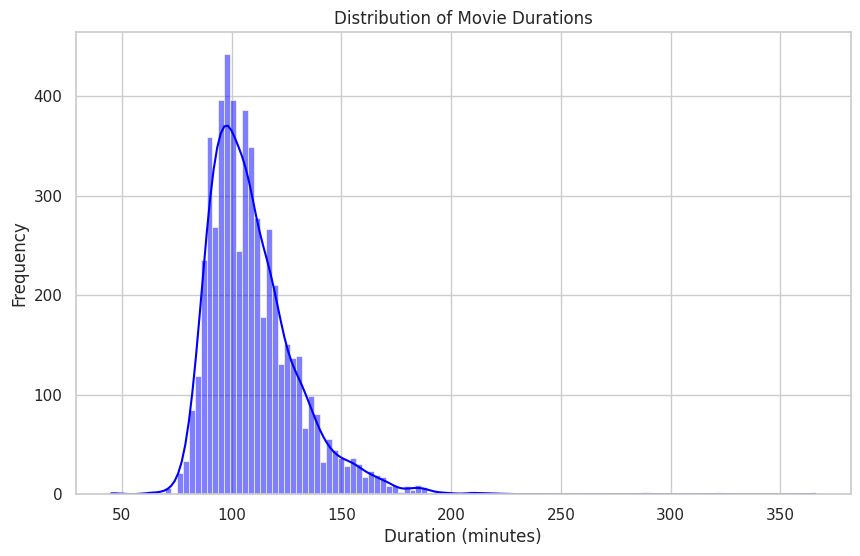

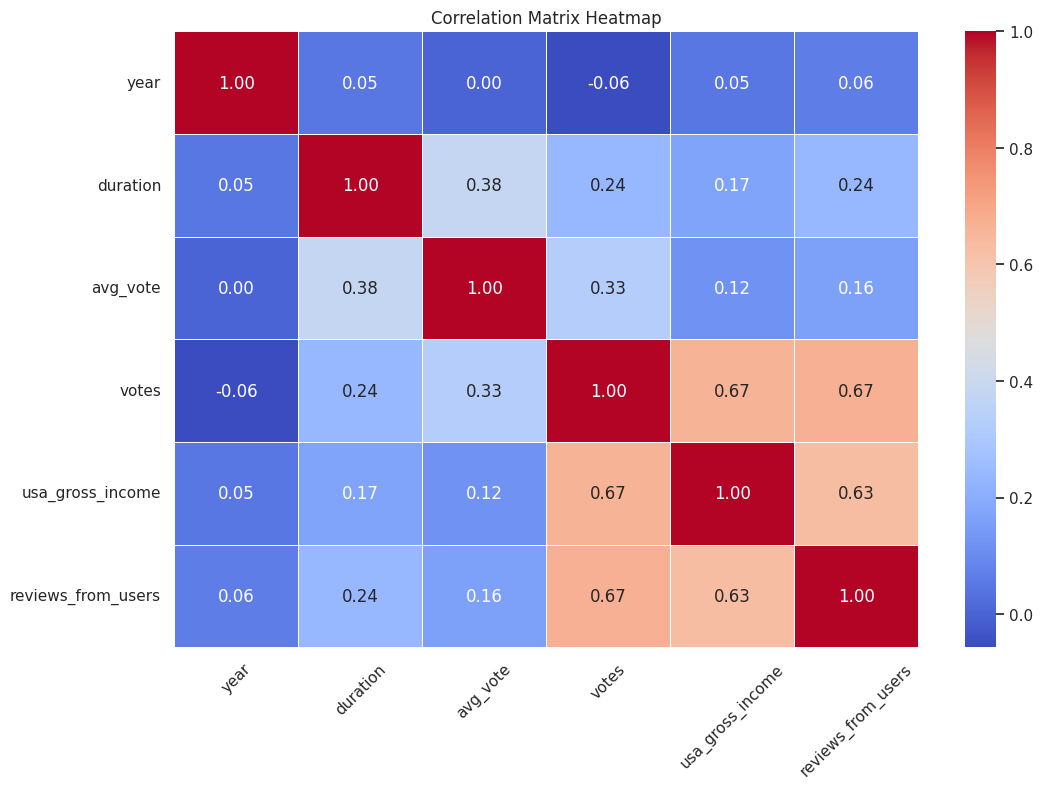

In [111]:
# 2. Visualization

# Graph 1: Distribution of Movie Durations
plt.figure(figsize=(10,6))
sns.histplot(df_cleaned['duration'], kde=True, color='blue')
plt.title('Distribution of Movie Durations')
plt.xlabel('Duration (minutes)')
plt.ylabel('Frequency')
plt.savefig('/content/drive/MyDrive/Colab Notebooks/Distribution_of_Movie_Durations.pdf')
plt.show()

# Graph 2: Correlation Heatmap
plt.figure(figsize=(12,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.xticks(rotation=45)
plt.title('Correlation Matrix Heatmap')
plt.savefig('/content/drive/MyDrive/Colab Notebooks/Correlation_Matrix_Heatmap.pdf')
plt.show()

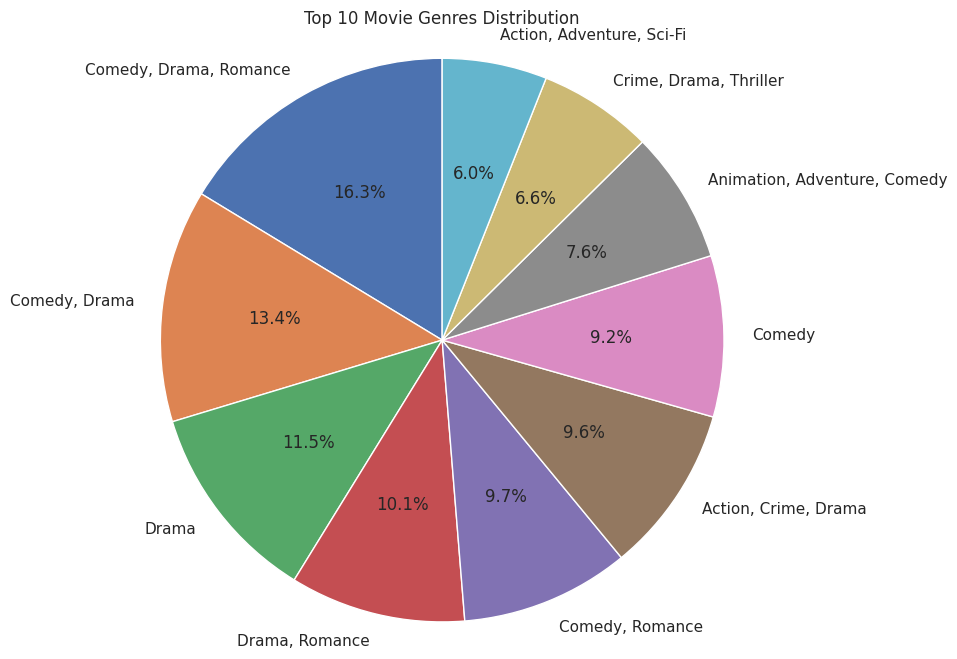

In [100]:
genre_counts = df_cleaned['genre'].value_counts()

top_10_genres = genre_counts.head(10)

# Pie Chart
plt.figure(figsize=(8, 8))
plt.pie(top_10_genres, labels=top_10_genres.index, autopct='%1.1f%%', startangle=90)
plt.title('Top 10 Movie Genres Distribution')
plt.axis('equal')
plt.show()

plt.savefig('/content/drive/MyDrive/Colab Notebooks/Top_10_Pie_Chart_Distribution_of_Genres.pdf')
plt.close()

In [101]:
print(df_cleaned.columns)

Index(['imdb_title_id', 'title', 'original_title', 'year', 'date_published',
       'genre', 'duration', 'country', 'language_1', 'director', 'writer',
       'actors', 'actors_1', 'actors_f2', 'description', 'desc35', 'avg_vote',
       'votes', 'budget', 'usa_gross_income', 'worlwide_gross_income',
       'reviews_from_users'],
      dtype='object')


                                     title  year  worlwide_gross_income
4741                     Avengers: Endgame  2019           2.797801e+09
1896                                Avatar  2009           2.790439e+09
4181  Star Wars - Il risveglio della Forza  2015           2.068224e+09
4740                Avengers: Infinity War  2018           2.048360e+09
1042                        Jurassic World  2015           1.670401e+09
5150                           Il Re Leone  2019           1.656964e+09
2111                          The Avengers  2012           1.518814e+09
4311                      Fast & Furious 7  2015           1.515048e+09
4819   Frozen II - Il segreto di Arendelle  2019           1.450027e+09
4115               Avengers: Age of Ultron  2015           1.402809e+09


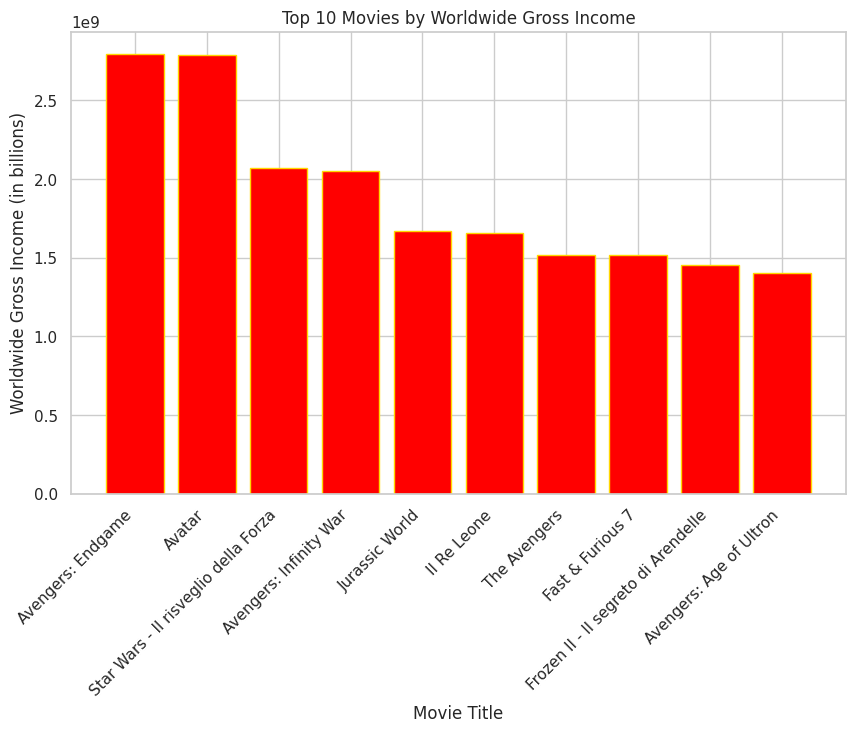

In [102]:
df_cleaned['worlwide_gross_income'] = pd.to_numeric(df_cleaned['worlwide_gross_income'], errors='coerce')

top_10_movies_by_revenue = df_cleaned.sort_values(by='worlwide_gross_income', ascending=False).head(10)

print(top_10_movies_by_revenue[['title', 'year', 'worlwide_gross_income']])

plt.figure(figsize=(10,6))
plt.bar(top_10_movies_by_revenue['title'], top_10_movies_by_revenue['worlwide_gross_income'], color='Red', edgecolor='Gold')
plt.xlabel('Movie Title')
plt.ylabel('Worldwide Gross Income (in billions)')
plt.title('Top 10 Movies by Worldwide Gross Income')
plt.xticks(rotation=45, ha='right')  # Rotate movie titles for better readability
plt.show()

plt.savefig('/content/drive/MyDrive/Colab Notebooks/Top_10_Movies_by_Worldwide_Gross_Income.pdf')
plt.close()


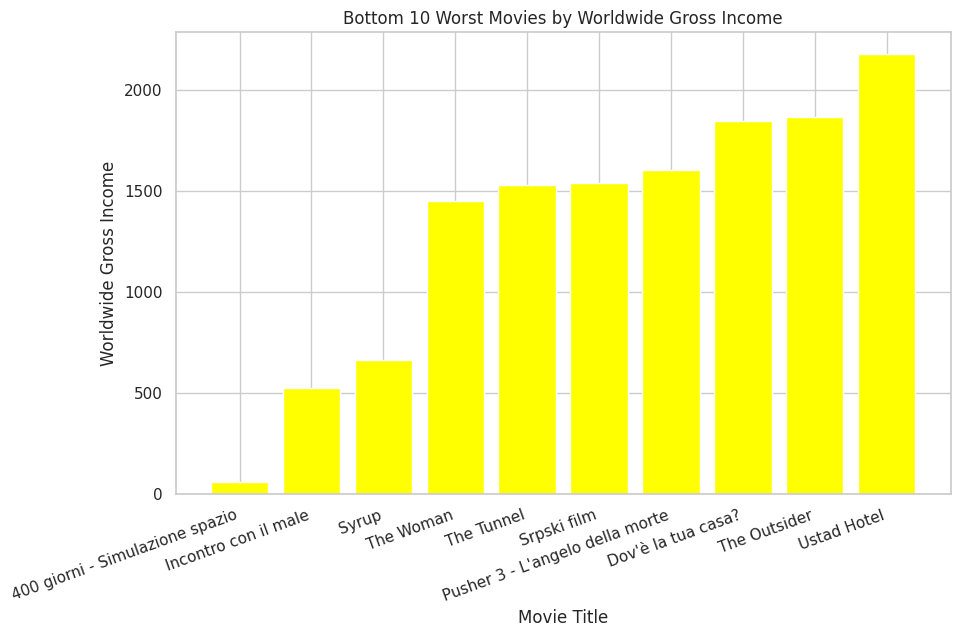

In [112]:
df_cleaned['worlwide_gross_income'] = pd.to_numeric(df_cleaned['worlwide_gross_income'], errors='coerce')

bottom_10_movies_by_revenue = df_cleaned.sort_values(by='worlwide_gross_income', ascending=True).head(10)

plt.figure(figsize=(10,6))

plt.bar(bottom_10_movies_by_revenue['title'], bottom_10_movies_by_revenue['worlwide_gross_income'], color='Yellow')
plt.title('Bottom 10 Worst Movies by Worldwide Gross Income')
plt.xlabel('Movie Title')
plt.ylabel('Worldwide Gross Income')

plt.xticks(rotation=20, ha='right')
plt.show()

plt.savefig('/content/drive/MyDrive/Colab Notebooks/Bottom_10_Movies_by_Worldwide_Gross_Income_Simple.pdf', bbox_inches='tight')
plt.close()


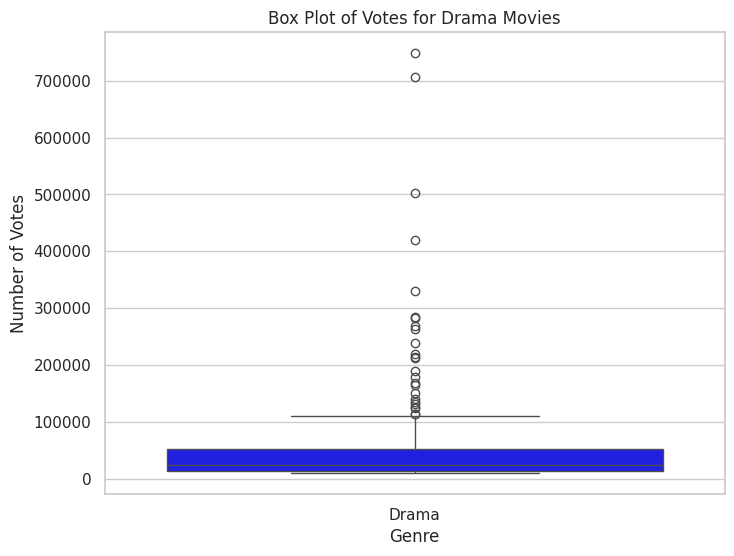

In [110]:
df_cleaned3 = df_cleaned[df_cleaned['genre'] == 'Drama']
x1 = df_cleaned['genre']
y1 = df_cleaned['votes']
plt.figure(figsize=(8, 6))
sns.boxplot( x= df_cleaned3['genre'], y= df_cleaned3['votes'] , color= 'blue')

plt.title('Box Plot of Votes for Drama Movies')
plt.xlabel('Genre')
plt.ylabel('Number of Votes')
plt.show()

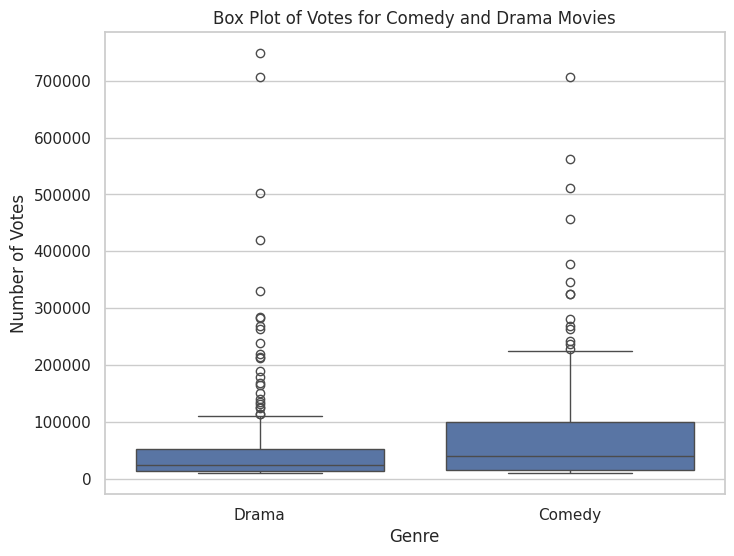

In [106]:
df_filtered = df_cleaned[df_cleaned['genre'].isin(['Comedy', 'Drama'])]

plt.figure(figsize=(8, 6))
sns.boxplot(x=df_filtered['genre'], y=df_filtered['votes'])

plt.title('Box Plot of Votes for Comedy and Drama Movies')
plt.xlabel('Genre')
plt.ylabel('Number of Votes')
plt.show()


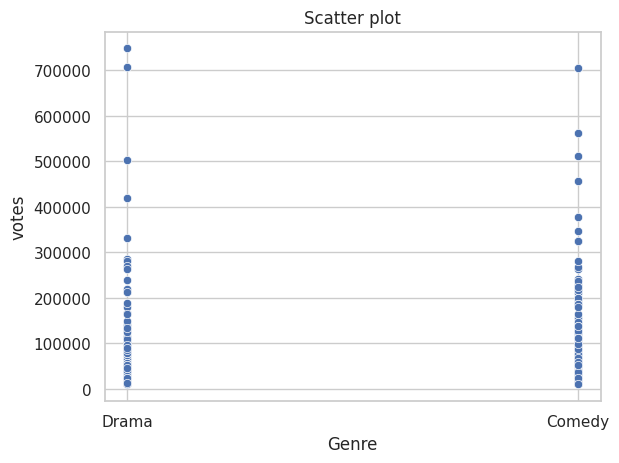

In [107]:
df_cleaned5 = df_cleaned[df_cleaned['genre'].isin(['Comedy', 'Drama'])]
sns.scatterplot(data = df_cleaned5 , x= 'genre', y= 'votes')
plt.title('Scatter plot')
plt.xlabel('Genre')
plt.ylabel('votes')
plt.show()

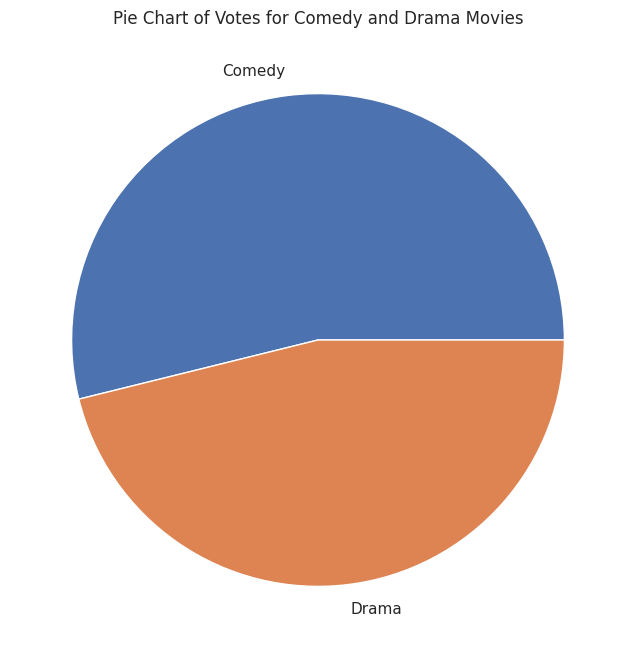

In [108]:
df_cleaned6 = df_cleaned[df_cleaned['genre'].isin(['Comedy', 'Drama'])]

votes = df_cleaned6.groupby('genre')['votes'].sum()

plt.figure(figsize=(8, 8))
plt.pie(votes, labels=['Comedy', 'Drama'])

plt.title('Pie Chart of Votes for Comedy and Drama Movies')
plt.show()


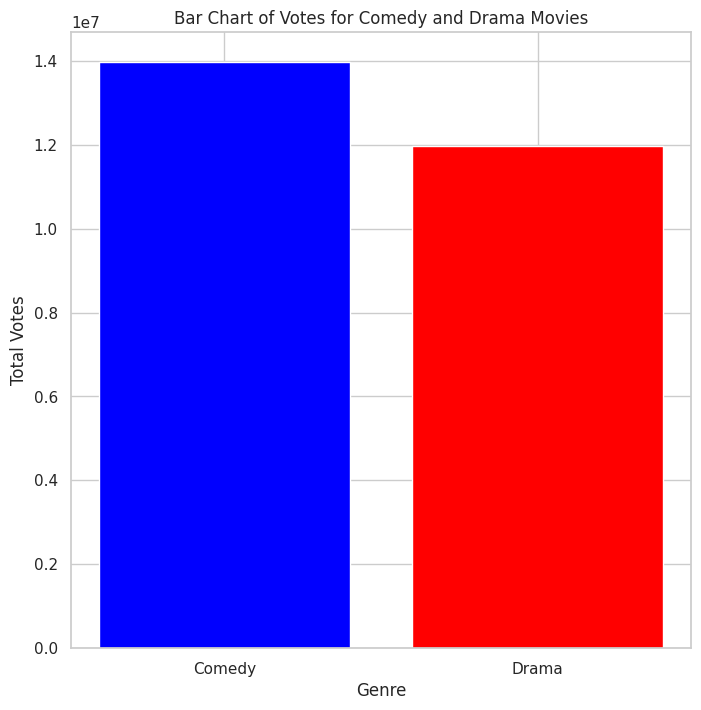

In [109]:
df_cleaned6 = df_cleaned[df_cleaned['genre'].isin(['Comedy', 'Drama'])]

# Aggregate total votes for each genre
votes = df_cleaned6.groupby('genre')['votes'].sum()

plt.figure(figsize=(8, 8))

plt.bar(votes.index, votes.values, color=['blue', 'red'])  # X: genres, Y: votes

plt.title('Bar Chart of Votes for Comedy and Drama Movies')
plt.xlabel('Genre')
plt.ylabel('Total Votes')

plt.show()
